In [2]:
import pandas as pd 
df = pd.read_csv("creditcard.csv")

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE, ADASYN 
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report

#from sklearn import cross_validation, linear_model
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

#For Decision Tree implementation
from scipy.stats import entropy
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#For KNN implementation
from sklearn.neighbors import KNeighborsClassifier

#For NB implementation 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PowerTransformer

#For Logistic Regression implementation 
from sklearn.linear_model import LogisticRegression

#For Random Forest implementation 
from sklearn.ensemble import RandomForestClassifier

#For SVM implementation 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#For MLP implementation 
from sklearn.neural_network import MLPClassifier

#For XGBoost 
from xgboost import XGBClassifier

#For LightGBM 
import lightgbm as lgbm

#For Stacking 
from sklearn.ensemble import StackingClassifier

In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=424)

/common/home/projectgrps/IS450/IS450G10/jupyterlab-venv/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:01:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


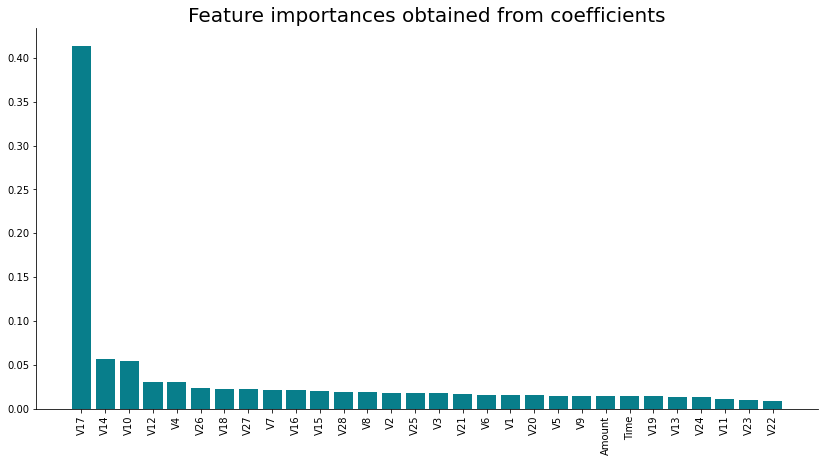

In [5]:
#Feature importance based on XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': xgb.feature_importances_
})
xgb_importances = xgb_importances.sort_values(by='Importance', ascending=False)
plt.bar(x=xgb_importances['Attribute'], height=xgb_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [6]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
#df = df.groupby('Class', group_keys=False).apply(lambda x: x.sample(100))
stratified_kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=424)

## XGBoost Top 2 Important Features

In [6]:
X, y = df[['V17', 'V14']], df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=424)

In [9]:
log_reg = LogisticRegression(random_state=424)

c_values = [0.1, 10, 100]
parameters = dict(C=c_values)
grid_search = GridSearchCV(estimator=log_reg,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Logistic Regression: {cv_score}\nTest score of Logistic Regression: {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Logistic Regression: 0.7055396250680397
Test score of Logistic Regression: 0.6952763641140478
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.79      0.61      0.69        82

    accuracy                           1.00     56962
   macro avg       0.90      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [10]:
log_reg_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', LogisticRegression(random_state=424)]])



param_grid = {'classifier__C':[0.1, 10, 100]}
grid_search = GridSearchCV(estimator=log_reg_smote_pipeline,
                           param_grid=param_grid,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Logistic Regression (SMOTE): {cv_score}\nTest score of Logistic Regression (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Logistic Regression (SMOTE): 0.2413118756665063
Test score of Logistic Regression (SMOTE): 0.22776723146241087
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56880
           1       0.06      0.89      0.11        82

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [11]:
log_reg_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', LogisticRegression(random_state=424)]])


param_grid = {'classifier__C':[0.1, 10, 100]}
grid_search = GridSearchCV(estimator=log_reg_adasyn_pipeline,
                           param_grid=param_grid,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Logistic Regression (ADASYN): {cv_score}\nTest score of Logistic Regression (ADASYN): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Logistic Regression (ADASYN): 0.11681052823315632
Test score of Logistic Regression (ADASYN): 0.10839546424097965
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56880
           1       0.01      0.93      0.03        82

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [12]:
log_reg_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', LogisticRegression(random_state=424)]])


param_grid = {'classifier__C':[0.1, 10, 100]}
grid_search = GridSearchCV(estimator=log_reg_nearmiss_pipeline,
                           param_grid=param_grid,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Logistic Regression (NearMiss): {cv_score}\nTest score of Logistic Regression (NearMiss): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Logistic Regression (NearMiss): 0.21260729195404243
Test score of Logistic Regression (NearMiss): 0.1300504736439731
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56880
           1       0.02      0.91      0.04        82

    accuracy                           0.94     56962
   macro avg       0.51      0.93      0.50     56962
weighted avg       1.00      0.94      0.97     56962



In [13]:
nb = GaussianNB()
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search = GridSearchCV(estimator=nb,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Naive Bayes: {cv_score}\nTest score of Naive Bayes: {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Naive Bayes: 0.6818061100478952
Test score of Naive Bayes: 0.639260874096992
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.52      0.78      0.63        82

    accuracy                           1.00     56962
   macro avg       0.76      0.89      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [14]:
nb_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                   ['classifier', GaussianNB()]])

parameters = {'classifier__var_smoothing': [0.1, 10, 100]}
grid_search = GridSearchCV(estimator=nb_smote_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Naive Bayes (SMOTE): {cv_score}\nTest score of Naive Bayes (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Naive Bayes (SMOTE): 0.6883690681602028
Test score of Naive Bayes (SMOTE): 0.6489058878962302
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.79      0.54      0.64        82

    accuracy                           1.00     56962
   macro avg       0.89      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [15]:
nb_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                   ['classifier', GaussianNB()]])

parameters = {'classifier__var_smoothing': [0.1, 10, 100]}
grid_search = GridSearchCV(estimator=nb_adasyn_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Naive Bayes (ADASYN): {cv_score}\nTest score of Naive Bayes (ADASYN): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Naive Bayes (ADASYN): 0.7396864102048126
Test score of Naive Bayes (ADASYN): 0.7140670248191661
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.70      0.73      0.71        82

    accuracy                           1.00     56962
   macro avg       0.85      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [16]:
nb_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                   ['classifier', GaussianNB()]])

parameters = {'classifier__var_smoothing': [0.1, 10, 100]}
grid_search = GridSearchCV(estimator=nb_nearmiss_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Naive Bayes (NearMiss): {cv_score}\nTest score of Naive Bayes (NearMiss): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Naive Bayes (NearMiss): 0.6693728578404138
Test score of Naive Bayes (NearMiss): 0.6215055728143746
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.77      0.50      0.61        82

    accuracy                           1.00     56962
   macro avg       0.89      0.75      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [23]:
dt= DecisionTreeClassifier(random_state=424)

parameters = {
    'max_depth': [5, 10, 20],
    'min_samples_leaf': [5, 20, 50],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Decision Tree: {cv_score}\nTest score of Decision Tree: {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Decision Tree: 0.7713430847577861
Test score of Decision Tree: 0.739230990183918
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.77      0.71      0.74        82

    accuracy                           1.00     56962
   macro avg       0.89      0.85      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [17]:
dt_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', DecisionTreeClassifier(random_state=424)]])

parameters = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_leaf': [5, 20, 50],
    'classifier__criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt_smote_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Decision Tree (SMOTE): {cv_score}\nTest score of Decision Tree (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Decision Tree (SMOTE): 0.24932714898440378
Test score of Decision Tree (SMOTE): 0.22755871746278028
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56880
           1       0.06      0.85      0.12        82

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [24]:
dt_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', DecisionTreeClassifier(random_state=424)]])

parameters = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_leaf': [5, 20, 50],
    'classifier__criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt_adasyn_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Decision Tree (ADASYN): {cv_score}\nTest score of Decision Tree (ADASYN): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Decision Tree (ADASYN): 0.1368298396141811
Test score of Decision Tree (ADASYN): 0.12625039248832837
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     56880
           1       0.02      0.90      0.04        82

    accuracy                           0.93     56962
   macro avg       0.51      0.92      0.50     56962
weighted avg       1.00      0.93      0.96     56962



In [19]:
dt_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', DecisionTreeClassifier(random_state=424)]])

parameters = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__min_samples_leaf': [5, 20, 50],
    'classifier__criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=dt_nearmiss_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Decision Tree (NearMiss): {cv_score}\nTest score of Decision Tree (NearMiss): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Decision Tree (NearMiss): 0.059501431156546734
Test score of Decision Tree (NearMiss): 0.03580065060995711
              precision    recall  f1-score   support

           0       1.00      0.50      0.66     56880
           1       0.00      0.98      0.01        82

    accuracy                           0.50     56962
   macro avg       0.50      0.74      0.33     56962
weighted avg       1.00      0.50      0.66     56962



In [20]:
rf = RandomForestClassifier(random_state=424)

parameters = {
    'max_depth': [5, 10, 20],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Random Forest: {cv_score}\nTest score of Random Forest: {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Random Forest: 0.7843820556100234
Test score of Random Forest: 0.774526033844184
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.86      0.70      0.77        82

    accuracy                           1.00     56962
   macro avg       0.93      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [21]:
rf_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', RandomForestClassifier(random_state=424)]])

parameters = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=rf_smote_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Random Forest (SMOTE): {cv_score}\nTest score of Random Forest (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Random Forest (SMOTE): 0.2776936304566698
Test score of Random Forest (SMOTE): 0.24796565039396454
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56880
           1       0.08      0.83      0.14        82

    accuracy                           0.99     56962
   macro avg       0.54      0.91      0.57     56962
weighted avg       1.00      0.99      0.99     56962



In [22]:
rf_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', RandomForestClassifier(random_state=424)]])

parameters = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=rf_adasyn_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Random Forest (ADASYN): {cv_score}\nTest score of Random Forest (ADASYN): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Random Forest (ADASYN): 0.1540676053600401
Test score of Random Forest (ADASYN): 0.12583126722013369
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56880
           1       0.02      0.78      0.04        82

    accuracy                           0.95     56962
   macro avg       0.51      0.87      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [23]:
rf_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', RandomForestClassifier(random_state=424)]])

parameters = {
    'classifier__max_depth': [5, 10, 20],
    'classifier__criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator=rf_nearmiss_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of Random Forest (NearMiss): {cv_score}\nTest score of Random Forest (NearMiss): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of Random Forest (NearMiss): 0.010762872242072157
Test score of Random Forest (NearMiss): 0.005841265499842168
              precision    recall  f1-score   support

           0       1.00      0.02      0.05     56880
           1       0.00      1.00      0.00        82

    accuracy                           0.02     56962
   macro avg       0.50      0.51      0.02     56962
weighted avg       1.00      0.02      0.05     56962



In [24]:
knn = KNeighborsClassifier()

parameters = {
    'n_neighbors': [5, 10, 15]
}

grid_search = GridSearchCV(estimator=knn,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of K Nearest Neighbours: {cv_score}\nTest score of K Nearest Neighbours: {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of K Nearest Neighbours: 0.7883772264791161
Test score of K Nearest Neighbours: 0.7530439867048621
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.85      0.67      0.75        82

    accuracy                           1.00     56962
   macro avg       0.92      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
knn_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', KNeighborsClassifier()]])

parameters = {
    'classifier__n_neighbors': [5, 10, 15]
}

grid_search = GridSearchCV(estimator=knn_smote_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of K Nearest Neighbours (SMOTE): {cv_score}\nTest score of K Nearest Neighbours (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of K Nearest Neighbours (SMOTE): 0.18431729303232167
Test score of K Nearest Neighbours (SMOTE): 0.16204193333462022
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56880
           1       0.03      0.84      0.06        82

    accuracy                           0.96     56962
   macro avg       0.52      0.90      0.52     56962
weighted avg       1.00      0.96      0.98     56962



In [26]:
knn_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', KNeighborsClassifier()]])

parameters = {
    'classifier__n_neighbors': [5, 10, 15]
}

grid_search = GridSearchCV(estimator=knn_adasyn_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of K Nearest Neighbours (ADASYN): {cv_score}\nTest score of K Nearest Neighbours (ADASYN): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of K Nearest Neighbours (ADASYN): 0.13132396552484404
Test score of K Nearest Neighbours (ADASYN): 0.11365152973616707
              precision    recall  f1-score   support

           0       1.00      0.93      0.97     56880
           1       0.02      0.82      0.03        82

    accuracy                           0.93     56962
   macro avg       0.51      0.88      0.50     56962
weighted avg       1.00      0.93      0.96     56962



In [27]:
knn_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', KNeighborsClassifier()]])

parameters = {
    'classifier__n_neighbors': [5, 10, 15]
}

grid_search = GridSearchCV(estimator=knn_nearmiss_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of K Nearest Neighbours (NearMiss): {cv_score}\nTest score of K Nearest Neighbours (NearMiss): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

Cross-validation score of K Nearest Neighbours (NearMiss): 0.03292068626404846
Test score of K Nearest Neighbours (NearMiss): 0.0266654205051482
              precision    recall  f1-score   support

           0       1.00      0.35      0.52     56880
           1       0.00      0.99      0.00        82

    accuracy                           0.35     56962
   macro avg       0.50      0.67      0.26     56962
weighted avg       1.00      0.35      0.51     56962



In [15]:
svm = SVC(kernel='linear').fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(svm,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
y_pred = svm.predict(X_test)

test_score = matthews_corrcoef(y_test, y_pred)
print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of SVM (SMOTE): {cv_score}\nTest score of SVM (SMOTE): {test_score}')
print(classification_report(y_test, y_pred))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of SVM (SMOTE): {'fit_time': array([11.19920087,  8.73548818, 10.895015  ,  9.8146596 , 10.91602802,
       10.31730509, 39.65924788,  9.15676999, 11.01161647,  9.38745427]), 'score_time': array([0.22225976, 0.22385502, 0.23494697, 0.23310924, 0.22920156,
       0.22731376, 0.2390995 , 0.22287059, 0.23794174, 0.23685622]), 'test_mcc': array([0.66903316, 0.74501657, 0.66903316, 0.79659897, 0.7536636 ,
       0.65085598, 0.66552917, 0.600549  , 0.65085598, 0.72887747])}
Test score of SVM (SMOTE): 0.6578179949220128
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.79      0.55      0.65        82

    accuracy                           1.00     56962
   macro avg       0.89      0.77      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Code with Hyperparamter Tuning
svm = SVC(kernel='linear')

parameters = {'kernel': ['rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(estimator=svm,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)

print(f'Cross-validation score of SVM (SMOTE): {cv_score}\nTest score of SVM (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [7]:
svm_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', LinearSVC()]])
svm_smote_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(svm_smote_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = svm_smote_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of SVM (SMOTE): {cv_score}\nTest score of SVM (SMOTE): {test_score}')
print(classification_report(y_test, svm_smote_pipeline.predict(X_test)))

C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of SVM (SMOTE): {'fit_time': array([111.71050882, 114.42131567, 117.6928947 , 121.30102348,
       118.55675983, 118.55265617, 119.44888544, 121.32017183,
       124.07896447, 119.40153503]), 'score_time': array([0.02585053, 0.0431335 , 0.0245409 , 0.03081608, 0.01596427,
       0.02823806, 0.01666713, 0.01445103, 0.01854706, 0.02285981]), 'test_mcc': array([0.26972515, 0.28222529, 0.30362991, 0.28690581, 0.31852287,
       0.29868859, 0.28152839, 0.29025453, 0.28773232, 0.27976481])}
Test score of SVM (SMOTE): 0.9861486605105158
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56880
           1       0.08      0.88      0.15        82

    accuracy                           0.99     56962
   macro avg       0.54      0.93      0.57     56962
weighted avg       1.00      0.99      0.99     56962

In [26]:
print(matthews_corrcoef(y_test, svm_smote_pipeline.predict(X_test)))

0.27014020222400326


In [ ]:
# code with Hyperparameter Tuning
svm_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', SVC(kernel='linear')]])

parameters = {'classifier__kernel': ['rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(estimator=svm_smote_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of SVM (SMOTE): {cv_score}\nTest score of SVM (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [8]:
svm_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', LinearSVC()]])
svm_adasyn_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(svm_adasyn_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = svm_adasyn_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of SVM (ADASYN): {cv_score}\nTest score of SVM (ADASYN): {test_score}')
print(classification_report(y_test, svm_adasyn_pipeline.predict(X_test)))

C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of SVM (ADASYN): {'fit_time': array([156.3342185 , 155.95192599, 158.69832969, 145.93547702,
       144.31940556, 158.94089651, 146.59657788, 135.81937432,
       133.79557562, 130.67130804]), 'score_time': array([0.02087641, 0.01824498, 0.04236484, 0.02442551, 0.03240347,
       0.0497942 , 0.01867342, 0.02239323, 0.01890063, 0.02226901]), 'test_mcc': array([0.14407083, 0.12804521, 0.12667573, 0.13106116, 0.13441631,
       0.12608536, 0.14573744, 0.12660048, 0.13175789, 0.12132444])}
Test score of SVM (ADASYN): 0.9266528562901584
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     56880
           1       0.02      0.91      0.03        82

    accuracy                           0.93     56962
   macro avg       0.51      0.92      0.50     56962
weighted avg       1.00      0.93      0.96     569

In [27]:
print(matthews_corrcoef(y_test, svm_adasyn_pipeline.predict(X_test)))

0.12144471616277028


In [ ]:
# Code with Hyperparamter Tuning
svm_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', SVC(kernel='linear')]])

parameters = {'classifier__kernel': ['rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(estimator=svm_adasyn_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of SVM (ADASYN): {cv_score}\nTest score of SVM (ADASYN): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [9]:
svm_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', LinearSVC()]])
svm_nearmiss_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(svm_nearmiss_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = svm_nearmiss_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of SVM (NearMiss): {cv_score}\nTest score of SVM (NearMiss): {test_score}')
print(classification_report(y_test, svm_nearmiss_pipeline.predict(X_test)))

C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\lingl\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of SVM (NearMiss): {'fit_time': array([1.36895394, 1.4258225 , 1.30185151, 1.21537971, 1.23107791,
       1.40309405, 1.31588554, 1.19048357, 1.23958158, 1.33856797]), 'score_time': array([0.02202439, 0.02209473, 0.01519442, 0.01277781, 0.02024913,
       0.02105856, 0.0195694 , 0.01711798, 0.01862454, 0.01799202]), 'test_mcc': array([0.12344726, 0.5586537 , 0.11667879, 0.11555203, 0.11484636,
       0.1104304 , 0.12869549, 0.1052641 , 0.12121837, 0.52456755])}
Test score of SVM (NearMiss): 0.9094484041992907
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56880
           1       0.01      0.93      0.03        82

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [28]:
print(matthews_corrcoef(y_test, svm_nearmiss_pipeline.predict(X_test)))

0.10981670036245596


In [ ]:
# Code with Hyperparamter Tuning
svm_nearmiss_pipeline = imbpipeline(steps = [['adasyn', NearMiss()],
                                        ['classifier', SVC(kernel='linear')]])

parameters = {'classifier__kernel': ['rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(estimator=svm_nearmiss_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of SVM (NearMiss): {cv_score}\nTest score of SVM (NearMiss): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [10]:
mlp = MLPClassifier(random_state=424, hidden_layer_sizes=(8,4,2,1), max_iter=100,activation = 'relu',solver='adam') 
mlp.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(mlp,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = mlp.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of MLP: {cv_score}\nTest score of MLP: {test_score}')
print(classification_report(y_test, mlp.predict(X_test)))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of MLP: {'fit_time': array([27.82755208, 28.23275137, 29.11865592, 27.7424736 , 31.77797532,
       27.52830696, 28.03951406, 28.56475163, 30.26480508, 27.70373988]), 'score_time': array([0.0392499 , 0.03842044, 0.03790307, 0.04346585, 0.03528571,
       0.03380895, 0.04283047, 0.02936506, 0.03701043, 0.04775858]), 'test_mcc': array([0.76951877, 0.75962643, 0.76985257, 0.83326281, 0.75295093,
       0.6733774 , 0.73871859, 0.6958797 , 0.80032092, 0.74953517])}
Test score of MLP: 0.9992451107756047
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.77      0.67      0.72        82

    accuracy                           1.00     56962
   macro avg       0.89      0.84      0.86     56962
weighted avg       1.00      1.00      1.00     56962



In [29]:
print(matthews_corrcoef(y_test, mlp.predict(X_test)))

0.7204476428060298


In [ ]:
# Code with Hyperparamter Tuning
mlp = MLPClassifier(random_state=424) 

parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50)],
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant','adaptive']
}

grid_search = GridSearchCV(estimator=mlp,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of MLP: {cv_score}\nTest score of MLP: {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [11]:
mlp_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', MLPClassifier(random_state=424, hidden_layer_sizes=(8,4,2,1), max_iter=100,activation = 'relu',solver='adam')]])


mlp_smote_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(mlp_smote_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = mlp_smote_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of MLP (SMOTE): {cv_score}\nTest score of MLP (SMOTE): {test_score}')
print(classification_report(y_test, mlp_smote_pipeline.predict(X_test)))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of MLP (SMOTE): {'fit_time': array([106.91664147, 145.78784156, 124.45764947, 263.22190928,
       137.14723468,  92.28412127, 166.21550131, 129.7397275 ,
       215.44585752,  88.82095504]), 'score_time': array([0.03755665, 0.04735351, 0.04392695, 0.05712152, 0.05353785,
       0.04888248, 0.03856826, 0.04762125, 0.04026961, 0.03476238]), 'test_mcc': array([0.26832813, 0.23310907, 0.21542544, 0.2129045 , 0.23815894,
       0.18766715, 0.2093066 , 0.21585227, 0.23494739, 0.19145646])}
Test score of MLP (SMOTE): 0.970682209192093
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56880
           1       0.04      0.93      0.08        82

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.97      0.98     56962


In [30]:
print(matthews_corrcoef(y_test, mlp_smote_pipeline.predict(X_test)))

0.19775461679944956


In [ ]:
# Code with Hyperparamter Tuning
mlp_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', MLPClassifier(random_state=424)]])

parameters = {
    'classifier__hidden_layer_sizes': [(50,50,50), (50,100,50)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__learning_rate': ['constant','adaptive']
}

grid_search = GridSearchCV(estimator=mlp_smote_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of MLP (SMOTE): {cv_score}\nTest score of MLP (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [12]:
mlp_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', MLPClassifier(random_state=424, hidden_layer_sizes=(8,4,2,1), max_iter=100,activation = 'relu',solver='adam')]])

mlp_adasyn_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(mlp_adasyn_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = mlp_adasyn_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of MLP (ADASYN): {cv_score}\nTest score of MLP (ADASYN): {test_score}')
print(classification_report(y_test, mlp_adasyn_pipeline.predict(X_test)))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of MLP (ADASYN): {'fit_time': array([201.90483665, 269.43234372, 186.05324435, 212.29370832,
       163.02588892, 172.89698625, 157.00515461, 218.39372873,
       217.7708056 , 131.79111099]), 'score_time': array([0.05479193, 0.04825687, 0.05016327, 0.08757305, 0.04110765,
       0.058851  , 0.06954455, 0.05392027, 0.05318356, 0.04364586]), 'test_mcc': array([0.11690524, 0.09651063, 0.12964267, 0.13198153, 0.12556109,
       0.11520996, 0.11190914, 0.09468884, 0.11115413, 0.1158216 ])}
Test score of MLP (ADASYN): 0.8500403777957235
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     56880
           1       0.01      0.93      0.02        82

    accuracy                           0.85     56962
   macro avg       0.50      0.89      0.47     56962
weighted avg       1.00      0.85      0.92     569

In [31]:
print(matthews_corrcoef(y_test, mlp_adasyn_pipeline.predict(X_test)))

0.08220963752958461


In [ ]:
# Code with Hyperparamter Tuning
mlp_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', MLPClassifier(random_state=424)]])

parameters = {
    'classifier__hidden_layer_sizes': [(50,50,50), (50,100,50)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__learning_rate': ['constant','adaptive']
}

grid_search = GridSearchCV(estimator=mlp_adasyn_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of MLP (ADASYN): {cv_score}\nTest score of MLP (ADASYN): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [13]:
mlp_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', MLPClassifier(random_state=424, hidden_layer_sizes=(8,4,2,1), max_iter=100,activation = 'relu',solver='adam')]])
mlp_nearmiss_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(mlp_nearmiss_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = mlp_nearmiss_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of MLP (NearMiss): {cv_score}\nTest score of MLP (NearMiss): {test_score}')
print(classification_report(y_test, mlp_nearmiss_pipeline.predict(X_test)))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of MLP (NearMiss): {'fit_time': array([1.93977499, 1.89469695, 1.77359223, 1.91282511, 1.86758113,
       1.8002274 , 1.62941122, 1.62783813, 1.62308121, 1.57774949]), 'score_time': array([0.0355649 , 0.02933717, 0.02676105, 0.03076386, 0.03444409,
       0.02629232, 0.02166438, 0.02873731, 0.03457761, 0.0227108 ]), 'test_mcc': array([-0.03054568, -0.03202251, -0.02923824,  0.00143506,  0.0013787 ,
        0.00151575,  0.0013497 , -0.0184063 , -0.05657496, -0.03283672])}
Test score of MLP (NearMiss): 0.0025631122502721114
              precision    recall  f1-score   support

           0       0.97      0.00      0.00     56880
           1       0.00      0.98      0.00        82

    accuracy                           0.00     56962
   macro avg       0.49      0.49      0.00     56962
weighted avg       0.97      0.00      0.00     56962



In [32]:
print(matthews_corrcoef(y_test, mlp_nearmiss_pipeline.predict(X_test)))

-0.025506242737020794


In [ ]:
# Code for Hyperparamater Tuning
mlp_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', MLPClassifier(random_state=424)]])

parameters = {
    'classifier__hidden_layer_sizes': [(50,50,50), (50,100,50)],
    'classifier__activation': ['tanh', 'relu'],
    'classifier__learning_rate': ['constant','adaptive'],
}

grid_search = GridSearchCV(estimator=mlp_nearmiss_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of MLP (NearMiss): {cv_score}\nTest score of MLP (NearMiss): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [14]:
xg_clf = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xg_clf.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(xg_clf,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = xg_clf.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of XGBoost: {cv_score}\nTest score of XGBoost: {test_score}')
print(classification_report(y_test, xg_clf.predict(X_test)))

C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of XGBoost: {'fit_time': array([1.4176445 , 1.77319169, 1.31248426, 1.92973781, 1.8785646 ,
       1.6685214 , 1.41145921, 1.36171079, 1.60417438, 1.59061527]), 'score_time': array([0.04160094, 0.0355432 , 0.02656007, 0.05114746, 0.05546069,
       0.03491187, 0.04329777, 0.03556275, 0.02758551, 0.02361608]), 'test_mcc': array([0.68675412, 0.66075017, 0.76951877, 0.78115246, 0.73748132,
       0.6867541 , 0.59320308, 0.65528757, 0.70405069, 0.70637812])}
Test score of XGBoost: 0.9992099996488887
              precision    recall  f1-score   supp

In [33]:
print(matthews_corrcoef(y_test, xg_clf.predict(X_test)))

0.6846111929893742


In [ ]:
# Code for Hyperparamater Tuning
xg_clf = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)

parameters = {
 'max_depth':[10,20,30]
}
grid_search = GridSearchCV(estimator=xg_clf,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of XGBoost: {cv_score}\nTest score of XGBoost: {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [15]:
xgb_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)]])
xgb_smote_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(xgb_smote_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = xgb_smote_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of XGBoost (SMOTE): {cv_score}\nTest score of XGBoost (SMOTE): {test_score}')
print(classification_report(y_test, xgb_smote_pipeline.predict(X_test)))

C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:33:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of XGBoost (SMOTE): {'fit_time': array([4.53891683, 4.32139397, 3.90283704, 4.12481618, 4.44846201,
       3.99624705, 4.33271265, 4.43728209, 5.98662472, 5.18012619]), 'score_time': array([0.03111815, 0.02882743, 0.03698349, 0.03914809, 0.04091024,
       0.02271509, 0.03291154, 0.1387043 , 0.05410957, 0.03286433]), 'test_mcc': array([0.22501216, 0.25465507, 0.25133083, 0.24538952, 0.27523124,
       0.2441195 , 0.23995074, 0.24381787, 0.24434525, 0.24178894])}
Test score of XGBoost (SMOTE): 0.9771777676345634
              precision    recall 

In [34]:
print(matthews_corrcoef(y_test, xgb_smote_pipeline.predict(X_test)))

0.2180149637286369


In [ ]:
# Code for Hyperparamater Tuning
xgb_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['classifier', XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)]])

parameters = {
 'classifier__max_depth':[10,20,30]
}
grid_search = GridSearchCV(estimator=xgb_smote_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of XGBoost (SMOTE): {cv_score}\nTest score of XGBoost (SMOTE): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [16]:
xgb_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)]])
xgb_adasyn_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(xgb_adasyn_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = xgb_adasyn_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of XGBoost (ADASYN): {cv_score}\nTest score of XGBoost (ADASYN): {test_score}')
print(classification_report(y_test, xgb_adasyn_pipeline.predict(X_test)))

C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:34:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:35:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of XGBoost (ADASYN): {'fit_time': array([6.47234654, 4.81658268, 6.05293489, 6.25221276, 5.33956575,
       5.74013615, 4.71053362, 4.17560601, 4.87743282, 4.87074327]), 'score_time': array([0.04444408, 0.041996  , 0.04512596, 0.04541397, 0.04448581,
       0.05691934, 0.03254533, 0.02425027, 0.05006552, 0.05383921]), 'test_mcc': array([0.12678842, 0.12574688, 0.13252237, 0.15125971, 0.12257815,
       0.12807924, 0.12839334, 0.12375733, 0.12919645, 0.12069158])}
Test score of XGBoost (ADASYN): 0.9184544082019592
              precision    recal

In [35]:
print(matthews_corrcoef(y_test, xgb_adasyn_pipeline.predict(X_test)))

0.11465501294748073


In [ ]:
# Code for Hyperparamater Tuning
xgb_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['classifier', XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)]])

parameters = {
 'classifier__max_depth':[10,20,30]
}
grid_search = GridSearchCV(estimator=xgb_adasyn_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of XGBoost (ADASYN): {cv_score}\nTest score of XGBoost (ADASYN): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [37]:
xgb_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)]])
xgb_nearmiss_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(xgb_nearmiss_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = xgb_adasyn_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of XGBoost (NearMiss): {cv_score}\nTest score of XGBoost (NearMiss): {test_score}')
print(classification_report(y_test, xgb_nearmiss_pipeline.predict(X_test)))

C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\lingl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of XGBoost (NearMiss): {'fit_time': array([1.58368802, 3.27993608, 1.50477242, 1.39823389, 1.86349964,
       1.51498055, 2.08871651, 1.52201533, 1.32409477, 1.32769704]), 'score_time': array([0.05042624, 0.06268096, 0.03827405, 0.04540181, 0.04754567,
       0.03960466, 0.03695107, 0.03186488, 0.02850056, 0.0322299 ]), 'test_mcc': array([0.01708408, 0.11204674, 0.01689291, 0.01682688, 0.0170309 ,
       0.01610939, 0.01484498, 0.01687172, 0.01969703, 0.10408442])}
Test score of XGBoost (NearMiss): 0.9184544082019592
              precision    r

In [38]:
print(matthews_corrcoef(y_test, xgb_nearmiss_pipeline.predict(X_test)))

0.015248210956041782


In [ ]:
# Code for Hyperparamater Tuning
xgb_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['classifier', XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)]])

parameters = {
 'classifier__max_depth':[10,20,30]
}
grid_search = GridSearchCV(estimator=xgb_nearmiss_pipeline,
                           param_grid=parameters,
                           scoring=make_scorer(matthews_corrcoef),
                           cv=stratified_kfold, error_score='raise')

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score of XGBoost (NearMiss): {cv_score}\nTest score of XGBoost (NearMiss): {test_score}')
print(classification_report(y_test, grid_search.best_estimator_.predict(X_test)))

In [18]:
lgbm.Dataset(X, categorical_feature='Class')
lgb_clf=lgbm.LGBMClassifier()
lgb_clf.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(lgb_clf,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = lgb_clf.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of LBGM: {cv_score}\nTest score of LGBM: {test_score}')
print(classification_report(y_test, lgb_clf.predict(X_test)))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of LBGM: {'fit_time': array([ 2.250664  ,  6.29876065, 13.04017806,  2.25111842,  2.33103156,
       17.81078911, 33.98879528, 13.82716012,  2.76780748,  2.44460487]), 'score_time': array([0.14278746, 0.15324473, 0.14484286, 0.12373662, 0.12032509,
       0.11196733, 0.22237182, 0.13110852, 0.16774368, 0.1136651 ]), 'test_mcc': array([ 0.58528136,  0.39550372,  0.62388446,  0.50410382,  0.55231899,
        0.47938458,  0.02701609, -0.00219989,  0.02863809,  0.65537722])}
Test score of LGBM: 0.998139110284049
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56880
           1       0.00      0.00      0.00        82

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [39]:
print(matthews_corrcoef(y_test, lgb_clf.predict(X_test)))

-0.0007795278740719617


In [19]:
lgbm.Dataset(X, categorical_feature='Class')
lgb_smote_pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=424)],
                                        ['lgbm', lgbm.LGBMClassifier()]])


lgb_smote_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(lgb_smote_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = lgb_smote_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of LGBM (SMOTE): {cv_score}\nTest score of LGBM (SMOTE): {test_score}')
print(classification_report(y_test, lgb_smote_pipeline.predict(X_test)))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of LGBM (SMOTE): {'fit_time': array([18.59146953, 58.15832853, 57.13276482, 42.53495884, 33.17841864,
       39.29083371, 20.72060108, 29.89983726, 10.31654859, 30.18591785]), 'score_time': array([0.12132287, 0.14397335, 0.11859822, 0.15015769, 0.15392494,
       0.12870455, 0.1121521 , 0.14508939, 0.11900711, 0.13105845]), 'test_mcc': array([0.21392458, 0.23849985, 0.25651347, 0.27554135, 0.27903172,
       0.24181979, 0.24534413, 0.21439205, 0.25336139, 0.23824027])}
Test score of LGBM (SMOTE): 0.9823039921351077
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56880
           1       0.06      0.84      0.12        82

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [40]:
print(matthews_corrcoef(y_test, lgb_smote_pipeline.predict(X_test)))

0.23074346325137812


In [20]:
lgbm.Dataset(X, categorical_feature='Class')
lgb_adasyn_pipeline = imbpipeline(steps = [['adasyn', ADASYN(random_state=424)],
                                        ['lgbm', lgbm.LGBMClassifier()]])


lgb_adasyn_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(lgb_adasyn_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = lgb_adasyn_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of LGBM (ADASYN): {cv_score}\nTest score of LGBM (ADASYN): {test_score}')
print(classification_report(y_test, lgb_adasyn_pipeline.predict(X_test)))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of LGBM (ADASYN): {'fit_time': array([ 86.04067087,  89.73316503, 115.75333571,  83.64850187,
        50.16501117,  79.54669213, 129.70816612, 168.05139399,
        58.60698009,  96.12190437]), 'score_time': array([0.39894032, 0.33370042, 0.47789097, 0.35899878, 0.29391408,
       0.24134994, 0.31682968, 0.47424769, 0.2395575 , 0.28733015]), 'test_mcc': array([0.11144678, 0.09995681, 0.13850835, 0.13983047, 0.12024008,
       0.12500278, 0.11253773, 0.12174544, 0.12298131, 0.12647794])}
Test score of LGBM (ADASYN): 0.9156981847547487
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56880
           1       0.01      0.85      0.03        82

    accuracy                           0.92     56962
   macro avg       0.51      0.88      0.49     56962
weighted avg       1.00      0.92      0.95     5

In [41]:
print(matthews_corrcoef(y_test, lgb_adasyn_pipeline.predict(X_test)))

0.10442864058489247


In [21]:
lgbm.Dataset(X, categorical_feature='Class')
lgb_nearmiss_pipeline = imbpipeline(steps = [['nearmiss', NearMiss()],
                                        ['lgbm', lgbm.LGBMClassifier()]])


lgb_nearmiss_pipeline.fit(X_train, y_train)
mcc = {'mcc': make_scorer(matthews_corrcoef)}
cv_score = cross_validate(lgb_nearmiss_pipeline,  X_train, y_train, cv = stratified_kfold, scoring = mcc)
# cv_score = cross_val_score(pipeline, X_train, y_train, cv = stratified_kfold)
test_score = lgb_nearmiss_pipeline.score(X_test, y_test)

print("Due to computational limitation, this model will not be tuned. The classification report shows the test set result.")
print(f'Cross-validation score of LGBM (Nearmiss): {cv_score}\nTest score of LGBM (Nearmiss): {test_score}')
print(classification_report(y_test, lgb_nearmiss_pipeline.predict(X_test)))

Due to computational limitation, this model will not be tuned. The classification report shows the test set result.
Cross-validation score of LGBM (Nearmiss): {'fit_time': array([33.7268734 , 29.32821918, 32.68744993, 20.02666783, 39.55700994,
       19.5903964 , 28.46383858, 30.65648127, 30.35178638,  2.73490977]), 'score_time': array([0.23391485, 0.31941414, 0.21056867, 0.28218126, 0.23108912,
       0.08901358, 0.070961  , 0.16439986, 0.09849858, 0.12218714]), 'test_mcc': array([0.00552199, 0.00637141, 0.00792442, 0.00704193, 0.00490286,
       0.0104614 , 0.00907932, 0.00865022, 0.00935566, 0.00728043])}
Test score of LGBM (Nearmiss): 0.04680313191250307
              precision    recall  f1-score   support

           0       1.00      0.05      0.09     56880
           1       0.00      1.00      0.00        82

    accuracy                           0.05     56962
   macro avg       0.50      0.52      0.04     56962
weighted avg       1.00      0.05      0.09     56962



In [42]:
print(matthews_corrcoef(y_test, lgb_nearmiss_pipeline.predict(X_test)))

0.008276786864053576
